## Exploring the Universal Mills List dataset

#### Dataset Description

The Universal Mills List (UML) is a spatially-explicit dataset of over 1,800 palm oil mills across 26 countries. Attributes including the parent company, mill name, RSPO certification status, and location were collected from individual mill lists using a standardized approach to prevent duplicates. Locations of the mills were verified from Planet nanosatellite imagery and assigned a unique universal ID. By ensuring data integrity through a standardized approach and verification process, the UML dataset provides further transparency towards the traceability of palm oil supply chains.

#### Notebook
In this notebook, I will explore and visualize the UML dataset using popular python libraries.

### 1. Import and Inputs

In [1]:
# import required libraries
import numpy as np                # for array indexing
import pandas as pd               # for exploring and filtering tabular data
import geopandas as gpd           # for extracting and visualizing location data
import matplotlib.pyplot as plt   # for plotting data

In [2]:
# read in the data
path_to_uml = 'data/uml.csv'
uml_df = pd.read_csv(path_to_uml)

### 2. Data Exploration

`pandas` allows for easy data exploration, filtering, and cleaning using vectorized methods. Let's explore the UML dataset.

In [3]:
# explore the first 10 rows of dataset
uml_df.head(10)

,UML_ID,Parent_Com,Mill_name,RSPO_STATU,RSPO_Type,Date,Latitude,Longitude,GPS,GPS_X,GPS_Y,ISO,Country,Province,District,Confidence,Alternativ,UML_ID_1
0,PO1000000017,Agropalma Group,Agropalma Group - Cpa Mill,Not RSPO Certified,NaN,43438,-2.253539,-48.585670,"-2.253539, -48.58567",-48.585670,-2.253539,BRA,Brazil,Pará,Acará,2 - High Confidence,NaN,PO1000000017
1,PO1000000019,Epa Management Sdn Bhd,Kulim (Malaysia) Berhad - Sedenak Palm Oil Mill,RSPO Certified,"RSPO Certified, MB",43438,1.730858,103.538323,"1.730858, 103.538323",103.538323,1.730858,MYS,Malaysia,Johor,Johor Baharu,1 - Fully Verified,NaN,PO1000000019
2,PO1000000020,Sime Darby Plantation Berhad,New Britain Palm Oil Ltd – Mosa,RSPO Certified,"RSPO Certified, IP",43438,-5.622500,150.237350,"-5.6225, 150.23735",150.237350,-5.622500,PNG,Papua New Guinea,West New Britain,Talasea,1 - Fully Verified,NaN,PO1000000020
3,PO1000000021,Inti Indosawit Subur,Pt Inti Indosawit Subur - Buatan I,Not RSPO Certified,NaN,43438,0.434444,101.825000,"0.4344444, 101.825",101.825000,0.434444,IDN,Indonesia,Riau,Siak,2 - High Confidence,NaN,PO1000000021
4,PO1000000052,Ioi Corporation Berhad,Pamol Estates (Sabah) Sdn Bhd - Pamol Sabah Pa...,RSPO Certified,"RSPO Certified, IP",43438,6.002431,117.398389,"6.002431, 117.398389",117.398389,6.002431,MYS,Malaysia,Sabah,Labuk & Sugut,1 - Fully Verified,NaN,PO1000000052
5,PO1000000053,Sipef Group,Hargy Palm Oil Mill - Sipef,RSPO Certified,"RSPO Certified, IP",43438,-5.311111,151.010970,"-5.311111, 151.01097",151.010970,-5.311111,PNG,Papua New Guinea,Bubu,Talasea,1 - Fully Verified,NaN,PO1000000053
6,PO1000000054,Musim Mas,Pt. Musim Mas - Pks Batang Kulim,RSPO Certified,"RSPO Certified, IP",43438,0.077043,102.030838,"0.077043, 102.030838",102.030838,0.077043,IDN,Indonesia,Riau,Pelalawan,1 - Fully Verified,NaN,PO1000000054
7,PO1000000058,Cargill Incorporated,Cargill - Hindoli,RSPO Certified,"RSPO Certified, IP",43438,-2.608100,104.125250,"-2.6081, 104.12525",104.125250,-2.608100,IDN,Indonesia,South Sumatra,Musi Banyuasin,2 - High Confidence,NaN,PO1000000058
8,PO1000000063,Sime Darby,Binuang Oil Mill - Sime Darby,RSPO Certified,"RSPO Certified, IP",43438,4.704457,118.060186,"4.704457, 118.060186",118.060186,4.704457,MYS,Malaysia,Sabah,Lahad Datu,1 - Fully Verified,NaN,PO1000000063
9,PO1000000064,Sime Darby,Merotai Oil Mill - Sime Darby,RSPO Certified,"RSPO Certified, MB",43438,4.369347,117.832905,"4.369347, 117.832905",117.832905,4.369347,MYS,Malaysia,Sabah,Tawau,1 - Fully Verified,NaN,PO1000000064


Each row appears to be a palm oil mill with a Unique ID and attributes related to RSPO status, location, and confidence level. 

We can find the number of palm oil mills in this dataframe by returning its length.

In [4]:
# find number of rows in dataset
len(uml_df)

1818

This dataset contains 1,818 palm oil mills.

Boolean filtering in `pandas` allows us to return rows of the dataframe in which the column matches a certain value, such as palm oil mills with an unknown parent company.

In [5]:
# find number of palm oil mills with unknown parent companies
unk_company_df = uml_df[uml_df['Parent_Com'] == 'Unknown']
unk_company_df.head()

,UML_ID,Parent_Com,Mill_name,RSPO_STATU,RSPO_Type,Date,Latitude,Longitude,GPS,GPS_X,GPS_Y,ISO,Country,Province,District,Confidence,Alternativ,UML_ID_1
20,PO1000000101,Unknown,Segaliud Oil Mill - Sime Darby,Not RSPO Certified,NaN,43438,5.726001,117.754574,"5.726001, 117.754574",117.754574,5.726001,MYS,Malaysia,Sabah,Sandakan,1 - Fully Verified,NaN,PO1000000101
148,PO1000000576,Unknown,Kks Bukit Mendi -Felda,Not RSPO Certified,NaN,43438,3.205803,102.303442,"3.205803, 102.303442",102.303442,3.205803,MYS,Malaysia,Pahang,Bera,1 - Fully Verified,NaN,PO1000000576
152,PO1000000607,Unknown,Ks Jengka 21-Felda,Not RSPO Certified,NaN,43438,3.740236,102.489625,"3.740236, 102.489625",102.489625,3.740236,MYS,Malaysia,Pahang,Maran,1 - Fully Verified,NaN,PO1000000607
253,PO1000001703,Unknown,Fpisb Ks Kalabakan,Not RSPO Certified,NaN,43438,4.370035,117.512487,"4.370035, 117.512487",117.512487,4.370035,MYS,Malaysia,Sabah,Tawau,1 - Fully Verified,NaN,PO1000001703
268,PO1000001895,Unknown,Fpisb Kilang Sawit Keratong 3,Not RSPO Certified,NaN,43438,2.929591,102.935503,"2.929591, 102.935503",102.935503,2.929591,MYS,Malaysia,Pahang,Rompin,1 - Fully Verified,NaN,PO1000001895


In [6]:
len(unk_company_df)

93

The parent company is unknown for 93 of the palm oil mills in this dataset.

We can use `.valuecounts()` to explore the values within a `Series` or column of a dataframe. Let's explore the most common countries in the dataframe.

In [7]:
# identify country with most palm oil mills in this dataset
uml_df['Country'].value_counts()

Indonesia             1043
Malaysia               503
Colombia                65
Thailand                43
Ecuador                 31
Guatemala               18
Papua New Guinea        15
Honduras                15
Mexico                  14
Brazil                  12
Côte d'Ivoire           11
Peru                    10
Costa Rica               8
Ghana                    7
India                    6
Panama                   4
Cambodia                 2
Dominican Republic       2
Nicaragua                2
Philipines               1
Solomon Islands          1
Sri Lanka                1
Madagascar               1
Gabon                    1
Venezuela                1
Nigeria                  1
Name: Country, dtype: int64

In [8]:
# find number of countries in dataset
len(uml_df['Country'].unique())

26

1,043 palm oil mills in this dataset are located in Indonesia, more than any other country. In total, there are 26 countries. 

### 3. Spatial Dataset Information

To extract spatial information, the UML dataframe must be converted to a `geodataframe`. `geopandas` is able to generate a `geodataframe` using XY coordinate data.

In [9]:
# read as geodataframe
uml_gdf = gpd.GeoDataFrame(
    uml_df,
    geometry=gpd.points_from_xy(uml_df['Longitude'], uml_df['Latitude']) # collect XY coord data from Longitude and Latitude columns
)

We can then use `GeoDataFrame.total_bounds` to return the spatial exent of the points in `[x_min, y_min, x_max, y_max]` format, where `x` is longitude and `y` is latitude.

In [10]:
# find spatial extent
uml_bounds = uml_gdf.total_bounds
uml_bounds

array([-94.917669, -18.233433, 160.2187  ,  18.978228])

All rows are between 18°S and 18°N, indicating all palm oil mills in this dataset are within the tropics

### 4. Data Visualization

Let's visualize palm oil mills by their RSPO certification status.

In [11]:
# find number of mills per certification status
uml_gdf['RSPO_STATU'].value_counts()

Not RSPO Certified    1462
RSPO Certified         356
Name: RSPO_STATU, dtype: int64

Of the 1,818 palm oil mills, 356 are RSPO certified and 1,462 are not.

`geopandas` includes pre-installed basemaps to visualize spatial data from geodataframes. We can visualize the palm oil mills locatoin using `geopandas` in conjunction with `matplotlib.pyplot`.

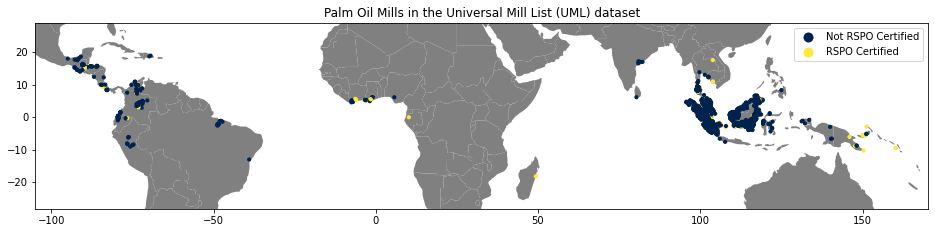

In [12]:
# retrieve world map from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# create matplotlib.pyplot figure
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(1,1,1)

# set axis limits using the geodataframes' spatial extent 
ax.set_xlim(uml_bounds[0] - 10, uml_bounds[2] + 10) # add 10 degree buffer
ax.set_ylim(uml_bounds[1] - 10, uml_bounds[3] + 10) # add 10 degree buffer

# add title
ax.set_title('Palm Oil Mills in the Universal Mill List (UML) dataset')

# plot
world.plot(ax=ax, color='gray')
uml_gdf.plot(
    ax=ax, 
    column='RSPO_STATU', # use the RSPO_STATU column to color rows
    categorical=True, 
    markersize=10, 
    legend=True,         # add legend
    cmap='cividis'
)